In [4]:
import numpy as np
%pip install plotly==5.8.0
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import seaborn as sb
import statsmodels.api as sm
import plotly.express as px
from google.colab import files
pd.set_option("display.precision",3)
np.set_printoptions(precision=5, suppress=True)
pd.options.display.float_format = '{:.4f}'.format
import plotly.io as pio

pio.renderers.default = "svg"

## Read the data

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Electric Vehicle Sales by State in India.csv')
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0000,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0000
1,2014.0000,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0000
2,2014.0000,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0000
3,2014.0000,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0000
4,2014.0000,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0000


## Information of the type of data in seach column

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


## Finding out the number of null values

In [6]:
df.isnull().sum()

,0
Year,0
Month_Name,0
Date,0
State,0
Vehicle_Class,0
Vehicle_Category,0
Vehicle_Type,0
EV_Sales_Quantity,0


## Descriptive Statistics of the dataset

In [8]:
df.describe()

,Year,EV_Sales_Quantity
count,96845.0000,96845.0000
mean,2018.6228,37.1089
std,2.8956,431.5667
min,2014.0000,0.0000
25%,2016.0000,0.0000
50%,2019.0000,0.0000
75%,2021.0000,0.0000
max,2024.0000,20584.0000


In [1]:
!pip install -U kaleido

In [2]:
import kaleido
import plotly.io as pio
pio.renderers.default = "svg"

In [115]:
sales_by_state=df['EV_Sales_Quantity'].groupby(df['State']).sum()
sales_by_state=pd.DataFrame(sales_by_state)
sales_by_state=sales_by_state.reset_index()


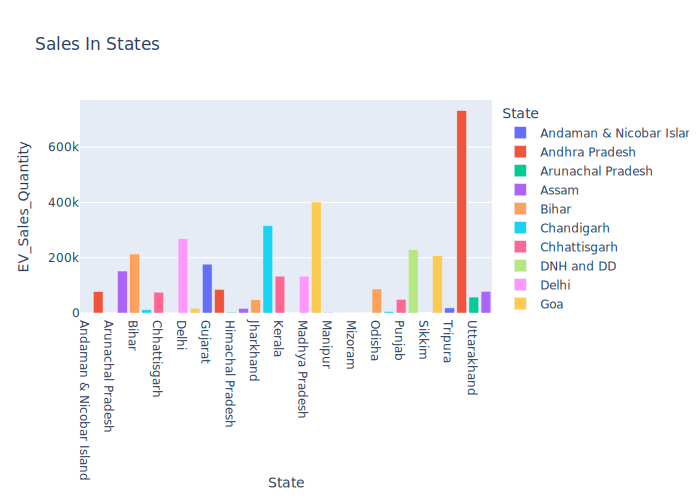

In [116]:
fig = px.bar(sales_by_state,x='State',y = 'EV_Sales_Quantity',color = 'State',title = 'Sales In States',labels = {'x':'States','y':'Ev Sales'})
fig.show(renderer="svg")

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1991: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



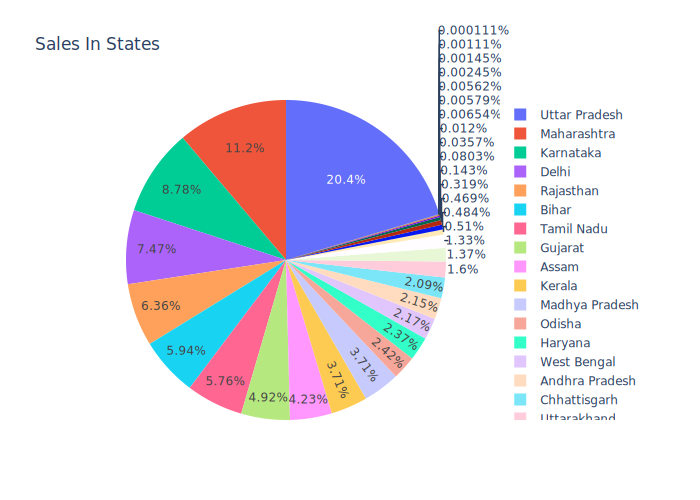

In [119]:
fig = px.pie(sales_by_state,names = 'State',values = 'EV_Sales_Quantity',title = 'Sales In States',labels = {'x':'States','y':'Ev Sales'})
pio.show(fig)

In [120]:
sales_by_vc = df['EV_Sales_Quantity'].groupby(df['Vehicle_Category']).sum()
sales_by_vc = pd.DataFrame(sales_by_vc)


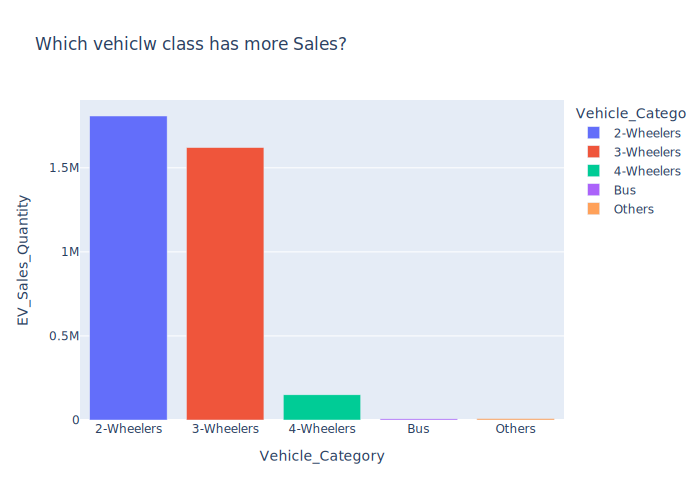

In [30]:
fig = px.bar(sales_by_vc,x='Vehicle_Category',y = 'EV_Sales_Quantity',color = 'Vehicle_Category',title = 'Which vehiclw class has more Sales?',labels = {'x':'vehicle class','y':'EV sales'})
pio.show(fig)

In [122]:
sales_per_year = df['EV_Sales_Quantity'].groupby(df['Year']).sum()
sales_per_year = pd.DataFrame(sales_per_year)
sales_per_year = sales_per_year.reset_index()
sales_per_year['Year'] = sales_per_year['Year'].astype(str)
sales_per_year['Year'] = sales_per_year['Year'].str.split('.').str[0]



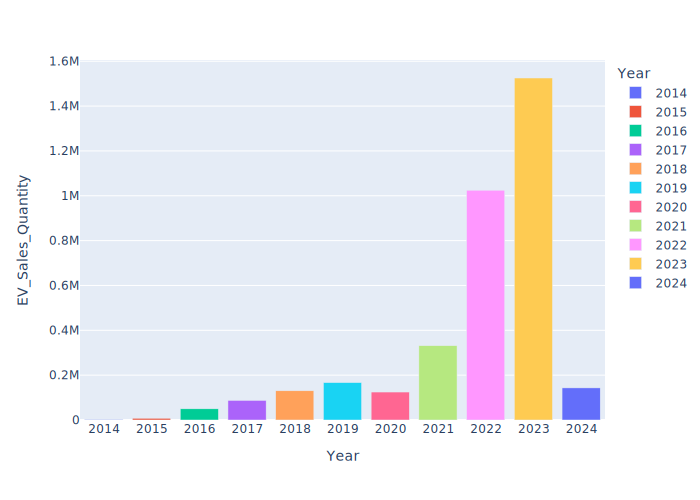

In [68]:
fig = px.bar(sales_per_year,x = 'Year',y = 'EV_Sales_Quantity',color = 'Year')
pio.show(fig)

In [123]:
sales_by_month = df['EV_Sales_Quantity'].groupby(df['Month_Name']).sum()
sales_by_month = pd.DataFrame(sales_by_month)
sales_by_month = sales_by_month.reset_index()

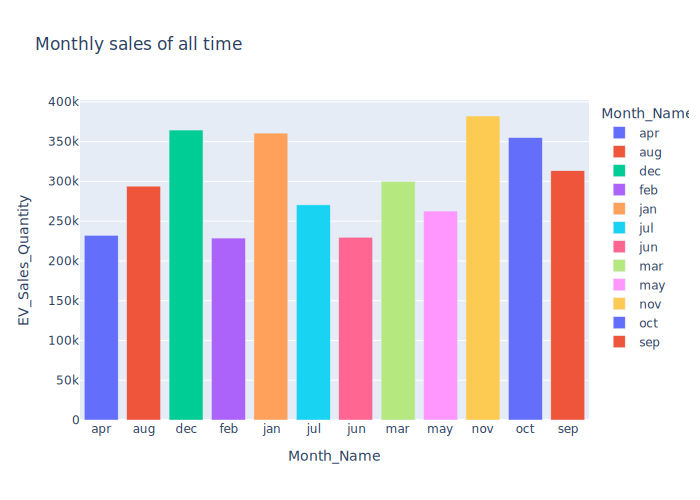

In [124]:
fig = px.bar(sales_by_month,x='Month_Name',y = 'EV_Sales_Quantity',color = 'Month_Name',title = 'Monthly sales of all time',labels = {'x':'Car Brands','y':'Top Speed Km/H'})
pio.show(fig)

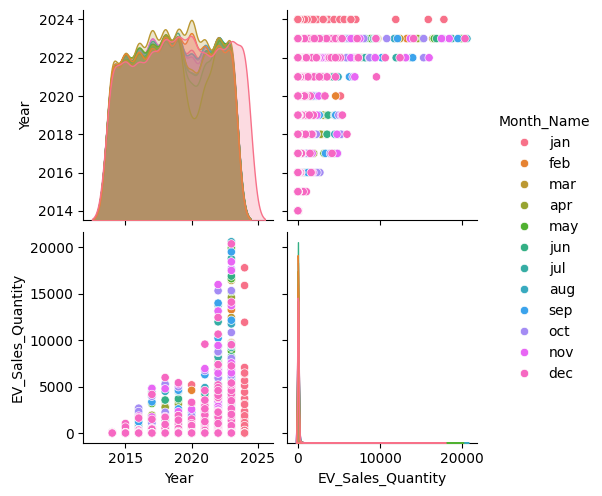

In [80]:
sb.pairplot(df,hue ="Month_Name")

Text(0.5, 1.0, 'Plug Type')

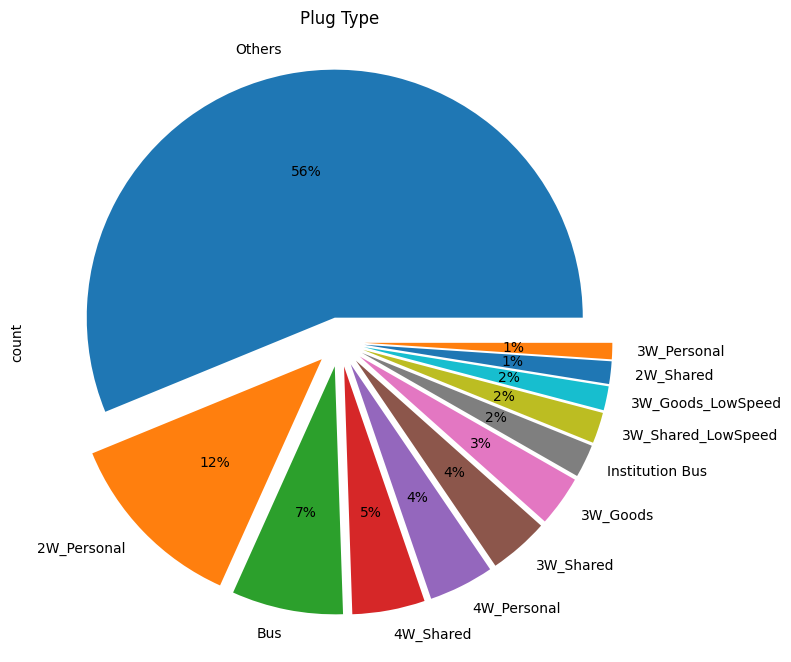

In [97]:
# Get the number of unique vehicle types
num_vehicle_types = len(df['Vehicle_Type'].value_counts())

# Create an explode tuple with the correct length
explode = tuple([0.1] * num_vehicle_types)

# Plot the pie chart
df['Vehicle_Type'].value_counts().plot.pie(figsize=(8,15), autopct='%.0f%%', explode=explode)
plt.title('Plug Type')

Text(0.5, 1.0, 'Seats')

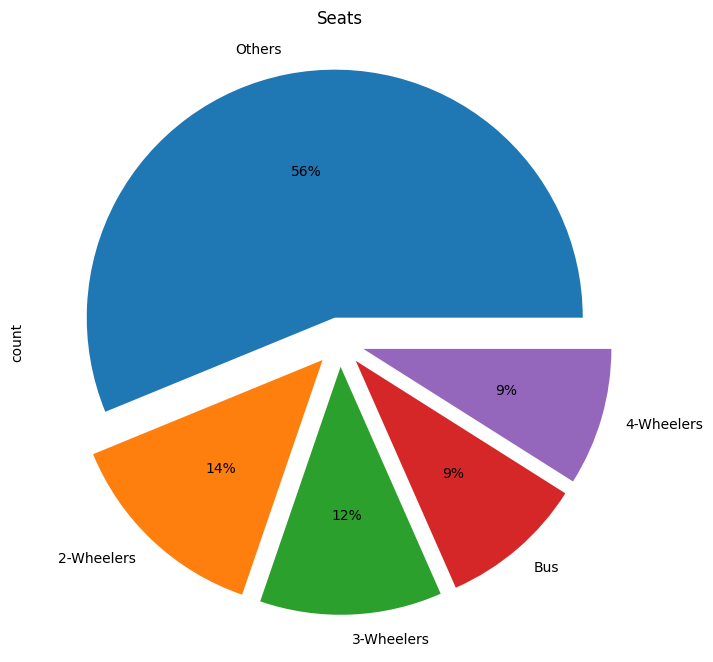

In [106]:
df['Vehicle_Category'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1))
plt.title('Seats')